In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
for i in df.columns:
    print(df[i].nunique())

98
16
156
147
206
3
2
2
3


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df2 = df.drop('Car_Name',axis='columns')

In [9]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df2['current year'] = 2020

In [11]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [12]:
df2['years_old'] = df2['current year'] - df2['Year']

In [13]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
df3 = df2.drop(['Year','current year'],axis = 'columns')

In [15]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
for i in df3.columns[3:6]:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [17]:
df4 = pd.get_dummies(df[['Fuel_Type','Seller_Type','Transmission']])

In [18]:
df4.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0,0,1,1,0,0,1
1,0,1,0,1,0,0,1
2,0,0,1,1,0,0,1
3,0,0,1,1,0,0,1
4,0,1,0,1,0,0,1


In [19]:
df5 = df4.drop(['Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual'],axis='columns')

In [20]:
df5.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,0,0,1,0
1,0,1,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,1,0


In [21]:
data = pd.concat([df3,df5],axis='columns')

In [22]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,0,1,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,1,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,0,1,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,0,1,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,1,0


In [23]:
final_data = data.drop(['Fuel_Type','Seller_Type','Transmission'],axis='columns')

In [24]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,3.35,5.59,27000,0,6,0,0,1,0
1,4.75,9.54,43000,0,7,0,1,1,0
2,7.25,9.85,6900,0,3,0,0,1,0
3,2.85,4.15,5200,0,9,0,0,1,0
4,4.60,6.87,42450,0,6,0,1,1,0


In [25]:
X = final_data.drop('Selling_Price',axis='columns')
y = final_data['Selling_Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction = model.predict(X_test)

In [32]:
model.score(X_test,y_test)

0.8756155246205001

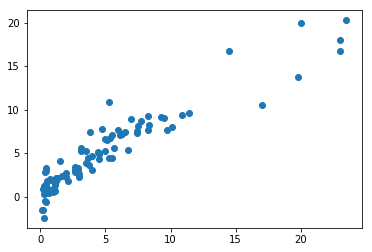

In [33]:
plt.scatter(y_test,prediction)

In [35]:
import pickle

In [36]:
filename = 'car_price.pkl'
pickle.dump(model, open(filename, 'wb'))